<a href="https://colab.research.google.com/github/PortugalJip2022/Portugal2022/blob/main/20230529_%E6%B0%B4%E8%B0%B7%E7%B7%A8%E9%9B%86_2_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

# ライブラリの読み込み
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 必須パッケージ
import glob

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


#データ読み込んではきだす

In [ ]:
# dataset_test.jsonを読み込み→結果をはきだす（dataset_test_o.json)

!pip install category_encoders

import pandas as pd
import numpy as np
import json
import category_encoders as ce
import pickle

# jsonファイル参照
with open('dataset_test.json','r') as f:
  data = json.load(f)

#dataframeに変換
df = pd.DataFrame([data])

#変数をカテゴリ変数化
cols = ["job"]
ce_df = ce.OrdinalEncoder(cols=cols, handle_unknown='impute')
df = ce_df.fit_transform(df)

#モデル読み込み
with open('model.pkl','rb') as f:
  model = pickle.load(f)

#あてはめ
p = model.predict(df)[0]
p_n=round(p*100,3)

#結果データ保存
data['p']=p
with open('dataset_test_o.json','w') as f:
  json.dump(data,f)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00


#１．モデル作成
lightGBMモデルを作っておく  
変数増やしてみた

In [ ]:
!pip install category_encoders

# ライブラリの読み込み
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 必須パッケージ
import glob

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

#データ読込
df = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv',delimiter=";")

#yのフラグを追加
df['y_flg']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

#変数加工

#連続値範囲指定
df['age_60'] = np.fmin(60,df['age'])
df['balance_5000'] = np.fmax(-1,df['balance'])
df['balance_5000'] = np.fmin(5000,df['balance_5000'])

#カテゴリまとめ作業
df['C_previous_b'] = df['previous'].apply(lambda x : x if x in (0,1,2) else 3)
df['C_pdays_b'] = pd.cut(x=df['pdays'], bins=[-999,-1,60,90,120,999],labels=False)



#変数をカテゴリ変数化
cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
#cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
ce_df = ce.OrdinalEncoder(cols=cols, handle_unknown='impute')
# ↑xgbモデルの場合はこれで問題なし（ダミー変数変換したものと同じ結果出力）
#ce_df = ce.OneHotEncoder(cols=cols, handle_unknown='impute')  #ダミー変数

df = ce_df.fit_transform(df)

df = df.drop("y", axis=1)
df = df.drop("age", axis=1)
df = df.drop("default", axis=1)
df = df.drop("balance", axis=1)
df = df.drop("contact", axis=1)
df = df.drop("day", axis=1)
df = df.drop("month", axis=1)
df = df.drop("duration", axis=1)
df = df.drop("campaign", axis=1)
df = df.drop("pdays", axis=1)
df = df.drop("previous", axis=1)

# df.dtypes

In [ ]:
#1テスト用に変数削除（年齢と残高だけでテスト）
#df = df.drop("job", axis=1)
df = df.drop("marital", axis=1)
df = df.drop("education", axis=1)
df = df.drop("housing", axis=1)
df = df.drop("loan", axis=1)
df = df.drop("poutcome", axis=1)
df = df.drop("C_previous_b", axis=1)
df = df.drop("C_pdays_b", axis=1)

# データ中身確認
df.head()


,job,y_flg,age_60,balance_5000
0,1,0,58,2143
1,2,0,44,29
2,3,0,33,2
3,4,0,47,1506
4,5,0,33,1


In [ ]:
#lightGBMモデル作成（共有会デモ用からコピーして編集）

#勾配ブースティングモデルパッケージ
import lightgbm as lgb
import pickle

#サンプリング（モデル作成データ、モデル検証データ作成）
train_df, test_df = train_test_split(df, test_size=0.5, random_state=3)

print(train_df.index.size)
print(test_df.index.size)

col = "y_flg"
train_y = train_df[col]
train_x = train_df.drop(col, axis=1)

val_y = test_df[col]
val_x = test_df.drop(col, axis=1)

train_data = lgb.Dataset(train_x,label=train_y)
eval_data = lgb.Dataset(val_x, label=val_y)

#  パラメータ設定
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']

#results_dict = {}


#モデル作成コード
# num_round = 10
gbm = lgb.train(param, train_data)

#モデル保存
with open('model.pkl','wb')as f:
  pickle.dump(gbm,f)




22605
22606
[LightGBM] [Info] Number of positive: 2672, number of negative: 19933
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 22605, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118204 -> initscore=-2.009549
[LightGBM] [Info] Start training from score -2.009549


In [ ]:
#データにモデルの予測値を追加
gbm.predict
predict = gbm.predict(train_x)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(val_x)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)

【勾配ブースティングモデルAR値】
モデル作成データ： 56.5325727414383
モデル検証データ： 31.288846236465595


参考  
【共有会時作成モデル　勾配ブースティングモデルAR値】

モデル作成データ： 50.27498181783228  
モデル検証データ： 46.55911725847381

In [ ]:
#【参考】決定木の分岐の可視化
lgb.create_tree_digraph(gbm, 1)

#１．モデル作成_work
lightGBMモデルを作っておく  
変数増やしてみた  
パラメータいじり

In [ ]:


#データ読込
df = pd.read_csv('https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv',delimiter=";")

#yのフラグを追加
df['y_flg']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

#変数加工

#連続値範囲指定
df['age_60'] = np.fmin(60,df['age'])
df['balance_5000'] = np.fmax(-1,df['balance'])
df['balance_5000'] = np.fmin(5000,df['balance_5000'])

#カテゴリまとめ作業
df['C_previous_b'] = df['previous'].apply(lambda x : x if x in (0,1,2) else 3)
df['C_pdays_b'] = pd.cut(x=df['pdays'], bins=[-999,-1,60,90,120,999],labels=False)



#変数をカテゴリ変数化
cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
#cols = ["job", "marital", "education", "housing", "loan", "poutcome", "C_previous_b","C_pdays_b"]
ce_df = ce.OrdinalEncoder(cols=cols, handle_unknown='impute')
# ↑xgbモデルの場合はこれで問題なし（ダミー変数変換したものと同じ結果出力）
#ce_df = ce.OneHotEncoder(cols=cols, handle_unknown='impute')  #ダミー変数

df = ce_df.fit_transform(df)

df = df.drop("y", axis=1)
df = df.drop("age", axis=1)
df = df.drop("default", axis=1)
df = df.drop("balance", axis=1)
df = df.drop("contact", axis=1)
df = df.drop("day", axis=1)
df = df.drop("month", axis=1)
df = df.drop("duration", axis=1)
df = df.drop("campaign", axis=1)
df = df.drop("pdays", axis=1)
df = df.drop("previous", axis=1)

# df.dtypes

In [ ]:
#1テスト用に変数削除（年齢と残高だけでテスト）
#df = df.drop("job", axis=1)
# df = df.drop("marital", axis=1)
# df = df.drop("education", axis=1)
# df = df.drop("housing", axis=1)
# df = df.drop("loan", axis=1)
# df = df.drop("poutcome", axis=1)
# df = df.drop("C_previous_b", axis=1)
# df = df.drop("C_pdays_b", axis=1)

# # データ中身確認
# df.head()


In [ ]:
#lightGBMモデル作成（共有会デモ用からコピーして編集）

#勾配ブースティングモデルパッケージ
import lightgbm as lgb
import pickle

#サンプリング（モデル作成データ、モデル検証データ作成）
train_df, test_df = train_test_split(df, test_size=0.5, random_state=3)

print(train_df.index.size)
print(test_df.index.size)

col = "y_flg"
train_y = train_df[col]
train_x = train_df.drop(col, axis=1)

val_y = test_df[col]
val_x = test_df.drop(col, axis=1)

train_data = lgb.Dataset(train_x,label=train_y)
eval_data = lgb.Dataset(val_x, label=val_y)

#  パラメータ設定
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']

#results_dict = {}


#モデル作成コード
# num_round = 10
gbm = lgb.train(param, train_data)

#モデル保存
with open('model.pkl','wb')as f:
  pickle.dump(gbm,f)




22605
22606
[LightGBM] [Info] Number of positive: 2672, number of negative: 19933
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 22605, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118204 -> initscore=-2.009549
[LightGBM] [Info] Start training from score -2.009549


In [ ]:
test_df.groupby('y_flg').count()

,job,marital,education,housing,loan,poutcome,age_60,balance_5000,C_previous_b,C_pdays_b
y_flg,,,,,,,,,,
0,19989,19989,19989,19989,19989,19989,19989,19989,19989,19989
1,2617,2617,2617,2617,2617,2617,2617,2617,2617,2617


In [ ]:
#データにモデルの予測値を追加
gbm.predict
predict = gbm.predict(train_x)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(val_x)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)

【勾配ブースティングモデルAR値】
モデル作成データ： 67.63033219669123
モデル検証データ： 44.82730308700737


##モデルブラッシュアップ_ver1.0
パラメータの設定をしてみる

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 2672, number of negative: 19933
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 22605, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118204 -> initscore=-2.009549
[LightGBM] [Info] Start training from score -2.009549
【勾配ブースティングモデルAR値】
モデル作成データ： 52.85213887180738
モデル検証データ： 45.21106975668867
accuracy score: 0.8923


<Axes: >

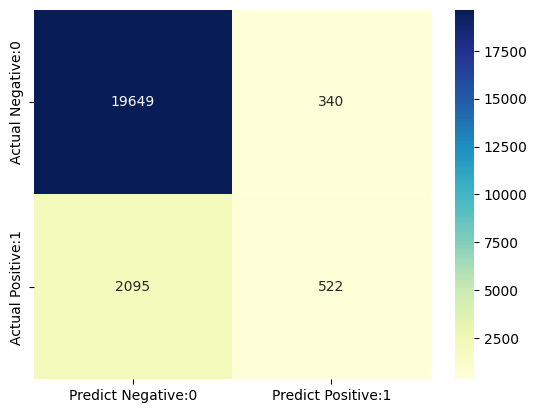

In [ ]:

##################################################################

#  パラメータ設定_ver1.0
param = {
         'objective': 'binary',
         'learning_rate': 0.01,            # 学習率（初期値0.1）
         'max_depth':0,
         'eval_metric':'auc',
         'num_leaves': 50,                 # 1本の木の最大葉枚数
         'min_data_in_leaf': 100,          # データの最小数（初期値20）
         'metric':'binary_logloss'
         }
# param['metric'] = ['auc', 'binary_logloss']

#results_dict = {}


#モデル作成コード
# num_round = 10
gbm = lgb.train(param,
                train_data,
                num_boost_round=100
                )

##################################################################

#データにモデルの予測値を追加
predict = gbm.predict(train_x)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(val_x)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)

# accuracy 算出
y_pred = gbm.predict(val_x, num_iteration=gbm.best_iteration)


y_pred = np.where(y_pred >= 0.3, 1, 0)
# y_pred = y_pred.round(0)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, val_y)
print(f"accuracy score: {accuracy:0.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(val_y,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'],
                                 index=['Actual Negative:0','Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')




In [ ]:
print('【答え】positive件数:', np.count_nonzero(val_y ==1))
print('【答え】negative件数:',np.count_nonzero(val_y ==0))

print('【予測】positive件数:', np.count_nonzero(y_pred ==1))
print('【予測】negative件数:',np.count_nonzero(y_pred ==0))

【答え】positive件数: 2617
【答え】negative件数: 19989
【予測】positive件数: 862
【予測】negative件数: 21744


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 2672, number of negative: 19933
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 22605, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118204 -> initscore=-2.009549
[LightGBM] [Info] Start training from score -2.009549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

<Axes: >

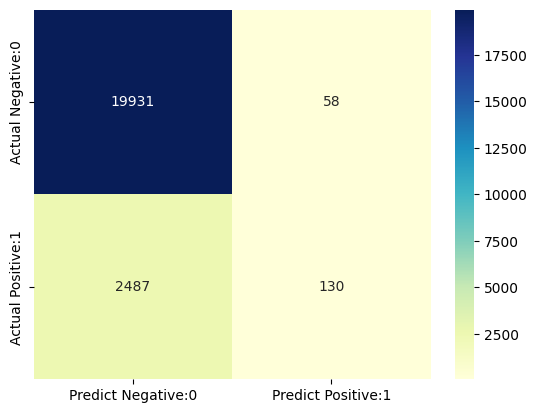

In [ ]:

##################################################################

#  パラメータ設定_ver1.0_copy
param = {
         'objective': 'binary',
         'learning_rate': 0.01,            # 学習率（初期値0.1）
         'max_depth':5,
         'eval_metric':'auc',
         'num_leaves': 50,                 # 1本の木の最大葉枚数
         'min_data_in_leaf': 100,          # データの最小数（初期値20）
         'metric':'binary_logloss'
         }
# param['metric'] = ['auc', 'binary_logloss']

#results_dict = {}


#モデル作成コード
# num_round = 10
gbm = lgb.train(param,
                train_data,
                num_boost_round=100
                )

##################################################################

#データにモデルの予測値を追加
predict = gbm.predict(train_x)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.45) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(val_x)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)

# accuracy 算出
y_pred = gbm.predict(val_x, num_iteration=gbm.best_iteration)
y_pred = np.where(y_pred >= 0.5, 1, 0)
# y_pred = y_pred.round(0)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, val_y)
print(f"accuracy score: {accuracy:0.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(val_y,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'],
                                 index=['Actual Negative:0','Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')




##モデルブラッシュアップ_ver2.0
optunaでパラメータの自動チューニング

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.8 MB/s eta 0:00:00


In [ ]:
# optuna経由でLightGBMをインポート
from optuna.integration import lightgbm as gbm

# 固定するパラメータ
params = {
    "boosting_type": "gbdt",
    'objective': 'binary',
    'metric': 'binary_logloss',
}


# Optunaでのパラメータ探索
model = lgb.train(params, train_data,
                  valid_sets=[train_data, eval_data],
                  # verbose_eval=100,
                  # early_stopping_rounds=100,
                 )

# 最適なパラメータの表示
best_params = model.params
print("Best params:", best_params)

[LightGBM] [Info] Number of positive: 2672, number of negative: 19933
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 22605, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118204 -> initscore=-2.009549
[LightGBM] [Info] Start training from score -2.009549
Best params: {'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'binary_logloss', 'num_iterations': 100}


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 2672, number of negative: 19933
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 22605, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118204 -> initscore=-2.009549
[LightGBM] [Info] Start training from score -2.009549
【勾配ブースティングモデルAR値】
モデル作成データ： 67.63033219669123
モデル検証データ： 44.82730308700737
accuracy score: 0.8894


<Axes: >

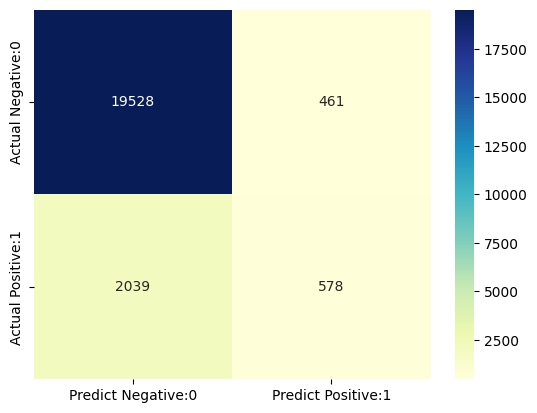

In [ ]:

##################################################################

#  パラメータ設定_ver2.0
param = {
         'boosting_type': 'gbdt',
         'objective': 'binary',
         'metric': 'binary_logloss',
         'num_iterations': 100
         }
# param['metric'] = ['auc', 'binary_logloss']

#results_dict = {}


#モデル作成コード
# num_round = 10
gbm = lgb.train(param,
                train_data,
                num_boost_round=100
                )

##################################################################

#データにモデルの予測値を追加
predict = gbm.predict(train_x)
train_df["p"] = predict

#AR値の計算
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(train_df['y_flg'],train_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_in = ar

print('【勾配ブースティングモデルAR値】')

print('モデル作成データ：',ar)

#予測確率の計算（モデル検証データ)
predict = gbm.predict(val_x)
test_df['p']=predict

#AR値の計算
auc = roc_auc_score(test_df['y_flg'],test_df['p'])
ar = 2 * (auc - 0.5) * 100
ar_out = ar

print('モデル検証データ：',ar)

# accuracy 算出
y_pred = gbm.predict(val_x, num_iteration=gbm.best_iteration)
y_pred = np.where(y_pred >= 0.4, 1, 0)
# y_pred = y_pred.round(0)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, val_y)
print(f"accuracy score: {accuracy:0.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(val_y,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'],
                                 index=['Actual Negative:0','Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')




参考  
【共有会時作成モデル　勾配ブースティングモデルAR値】

モデル作成データ： 50.27498181783228  
モデル検証データ： 46.55911725847381

In [ ]:
#【参考】決定木の分岐の可視化
lgb.create_tree_digraph(gbm, 1)

#コードサンプル３_01
lightGBMモデル作成  
モデルを保存して呼び出し  
画面遷移変更

## 設定

In [ ]:
#@title Flask
project_name = "sum_app" #@param {type:"string"}


In [ ]:
#@title サーバー
port = "8000" #@param {type:"string"}
host = True #@param {type:"boolean"}
from google.colab.output import eval_js
host = eval_js(f"google.colab.kernel.proxyPort({str(port)})")


## ソース

In [ ]:
#フォルダ作成
!rm -rf $project_name
!mkdir $project_name && mkdir $project_name/templates && mkdir $project_name/static

In [ ]:
#@title sum.html ver2.0
%%writefile $project_name/templates/sum.html

<!DOCTYPE html>
<html lang="ja">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>テストフォーム</title>
</head>
<body>
    <h2>契約率算出フォーム</h2>
    <form action="/form" method="POST">
      年齢　<input name="Age"></input>
      </br>
      残高　<input name="Balance"></input>
      </br>
      職業
      <style>
      .box select{
        width: 300px;
        height: 80px;
      }
      </style>
      <select name="Job">
        <option value="management">管理者</option>
        <option value="blue-collar">ブルーカラー</option>
        <option value="entrepreneur">起業家</option>
        <option value="housemaid">家事手伝い</option>
        <option value="management">経営</option>
        <option value="retired">退職</option>
        <option value="self-employed">自営業</option>
        <option value="services">サービス業</option>
        <option value="student">学生</option>
        <option value="technician">技術者</option>
        <option value="unemployed">無職</option>
        <option value="unknown">その他</option>
      </select>
    </br>
    </br>
      <button type="submit">送信</button>
    </form>
</body>
</html>

Overwriting sum_app/templates/sum.html


In [ ]:
#@title result.html
%%writefile $project_name/templates/result.html

<div class="container mt-4">
    <h2>入力データ</h2>
    <p>年齢：{{ result.age }}</p>
    <p>残高：{{ result.balance }}</p>
    <p>職業：{{ result.job }}</p>
    <h2>計算結果</h2>
    <p>{{ result.p_n }}％の確率で契約しそう</p>
    <p>
     <a href="{{ url_for('form') }}">戻る</a>
     </p>

</div>


Overwriting sum_app/templates/result.html


In [ ]:
#@title sum.py(json)形式で入力データ保存) ver2.0

%%writefile $project_name/sum.py

from flask import Flask, redirect ,request,render_template,jsonify

import pandas as pd
import numpy as np
import json
import requests
import datetime

import pickle
import traceback
import category_encoders as ce

app = Flask(__name__)

#モデル読み込み
with open('model.pkl','rb') as f:
  model = pickle.load(f)

#モデル読み込み
#with open('/content/sum_app/model.pkl','rb') as f:
#  model = pickle.load(f)

@app.route("/")
def check():
    return render_template("sum.html")

@app.route('/form', methods=["GET","POST"])
def form():
  if request.method == 'GET':
      return render_template("sum.html")

  if request.method == 'POST':
    w_age = int(request.form['Age'])
    w_balance = int(request.form['Balance'])
    w_job = request.form['Job']

    w_data = {
      'job':w_job,
      'age' :w_age,
      'balance' : w_balance,
    }
    # データ保存
    ## 現在日時を取得してファイル名を設定
    now = datetime.datetime.now()
    filename ='dataset_'+now.strftime('%Y%m%d_%H%M%S')+'.json'
    filename_o ='dataset_'+now.strftime('%Y%m%d_%H%M%S')+'_out.json'

    with open(filename,'w') as f:
      json.dump(w_data,f)

    # jsonファイル参照
    with open(filename,'r') as f:
      data = json.load(f)

    #dataframeに変換
    df = pd.DataFrame([data])

    #変数をカテゴリ変数化
    cols = ["job"]
    ce_df = ce.OrdinalEncoder(cols=cols, handle_unknown='impute')
    df = ce_df.fit_transform(df)

    #あてはめ
    p = model.predict(df)[0]
    p_n=round(p*100,3)

    #結果データ保存
    data['p']=p
    with open(filename_o,'w') as f:
      json.dump(data,f)

    w_data['p']=p
    w_data['p_n']=p_n

    return render_template('result.html',result=w_data)




@app.route("/output", methods=["POST"])
def output():
  try:
    Age = int(request.json["Age"])  #年齢
    Balance = int(request.json["Balance"])  #残高

    # データ保存
    w_data = {'age_60':Age, 'balance_5000':Balance}
    with open('w_data.json','w') as f:
      json.dump(w_data,f)

    # jsonファイル参照
    with open('w_data.json','r') as f:
      data = json.load(f)

    #dataframeに変換
    df = pd.DataFrame([data])



    #あてはめ
    p = model.predict(df)[0]
    p_n=round(p,4)*100

    #結果データ保存
    data['p']=p
    with open('w_data_result.json','w') as f:
      json.dump(data,f)

    data = {"result":p,"result":p_n, "Age":Age, "Balance":Balance, "msg":"%s％の確率で契約しそう"%(p_n)}
    return jsonify(ResultSet=json.dumps(data)), 200
    data = {"result":p}
    return jsonify(ResultSet=json.dumps(data)), 200

  except Exception as err:
    print(err)
    trace = traceback.format_exc()
    return {"error":trace},500

    #data = {"error":"err"}
    #return jsonify(ResultSet=json.dumps(data)), 500

if __name__ == "__main__":
    import sys
    args = sys.argv
    app.run(debug=True, port=args[1])


Overwriting sum_app/sum.py


## webサーバーの起動

In [ ]:
print('①が起動してから、↓のurlにアクセスする')
print(host)

①が起動してから、↓のurlにアクセスする
https://j01vqy8a7o-496ff2e9c6d22116-8000-colab.googleusercontent.com/


In [ ]:
#①
!python $project_name/sum.py $port

 * Serving Flask app 'sum'
 * Debug mode: on
 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 428-864-019
127.0.0.1 - - [25/Aug/2023 02:45:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Aug/2023 02:45:35] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Aug/2023 02:45:48] "POST /form HTTP/1.1" 200 -
127.0.0.1 - - [25/Aug/2023 02:45:49] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Aug/2023 02:45:55] "GET /form HTTP/1.1" 200 -
127.0.0.1 - - [25/Aug/2023 02:45:56] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Aug/2023 02:46:04] "POST /form HTTP/1.1" 200 -
127.0.0.1 - - [25/Aug/2023 02:46:05] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Aug/2023 02:46:15] "GET /form HTTP/1.1" 200 -
127.0.0.1 - - [25/Aug/2023 02:46:15] "GET /favicon.ico HTTP/1.1" 404 -


##  旧ソース

In [ ]:
#@title sum.html

%%writefile $project_name/templates/sum.html


<!doctype html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <title>sum app</title>
</head>
<body>
    年齢<input type="text" value="0" name="Age" /> 残高 <input type="text" value="0" name="Balance" /> <button id="run">計算</button><br/>
    <h2>結果</h2>
    <script src="static/post.js"></script>
</body>
</html>



Overwriting sum_app/templates/sum.html


In [ ]:
#@title post.js

%%writefile $project_name/static/post.js


fetch("https://code.jquery.com/jquery-3.4.1.min.js").then(r=>{return r.text()}).then(t=>eval(t)).then(()=>{
	$=jQuery;
    document.getElementById("run").addEventListener("click",
        function(){
            values=[...document.querySelectorAll("input")].map(_=>_.value);
            $.ajax({
                url:"/output",
                type:"POST",
                data:JSON.stringify({"Age":values[0],"Balance":values[1]}),
                contentType:"application/json"
            }).done(data=>{
                $(document.body).append(JSON.parse(data.ResultSet).msg,"<br/>");
            }).fail(data=>{
                $(document.body).append("error","<br/>")
            });
        },false);
});




Writing sum_app/static/post.js


In [ ]:
#@title sum.py(json)形式で入力データ保存)

%%writefile $project_name/sum.py

from flask import Flask, redirect ,request,render_template,jsonify

import pandas as pd
import numpy as np
import json
import requests

import pickle
import traceback

app = Flask(__name__)

#モデル読み込み
# with open('model.pkl','rb') as f:
#   model = pickle.load(f)

#モデル読み込み
with open('/content/sum_app/model.pkl','rb') as f:
  model = pickle.load(f)

@app.route("/")
def check():
    return render_template("sum.html")

@app.route("/output", methods=["POST"])
def output():
  try:
    Age = int(request.json["Age"])  #年齢
    Balance = int(request.json["Balance"])  #残高

    # データ保存
    w_data = {'age_60':Age, 'balance_5000':Balance}
    with open('w_data.json','w') as f:
      json.dump(w_data,f)

    # jsonファイル参照
    with open('w_data.json','r') as f:
      data = json.load(f)

    #dataframeに変換
    df = pd.DataFrame([data])

    #あてはめ
    p = model.predict(df)[0]
    p_n=round(p,4)*100

    #結果データ保存
    data['p']=p
    with open('w_data_result.json','w') as f:
      json.dump(data,f)

    data = {"result":p,"result":p_n, "Age":Age, "Balance":Balance, "msg":"%s％の確率で契約しそう"%(p_n)}
    return jsonify(ResultSet=json.dumps(data)), 200
    data = {"result":p}
    return jsonify(ResultSet=json.dumps(data)), 200

  except Exception as err:
    print(err)
    trace = traceback.format_exc()
    return {"error":trace},500

    #data = {"error":"err"}
    #return jsonify(ResultSet=json.dumps(data)), 500

if __name__ == "__main__":
    import sys
    args = sys.argv
    app.run(debug=True, port=args[1])


Overwriting sum_app/sum.py
